In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt
import cv2
from sklearn import datasets
from PIL import Image
import numpy as np
import time
from emnist import list_datasets
from emnist import extract_training_samples,extract_test_samples
import emnist

In [5]:
#Loading letters dataset
letters, _ = extract_test_samples('letters')

In [6]:
letters.shape

(20800, 28, 28)

In [8]:
def Get_All_Desc(images):
    '''
        this function returns a list of dictionnaries containing all images in letters dataset + their descriptor
    '''
    images_descriptors = []
    image = []

    for i in range(len(images)):
        image = images[i]
        image_and_desc = { 'image':image,'desc':image.flatten()} #change descriptor here!
        images_descriptors.append(image_and_desc)

    return images_descriptors

def Get_Distances(images_descriptors,query_image):
    ''' 
        this function returns a list of dictionnaries containing all images in letters dataset + their descriptor + the distance between the query image descriptor         & the descriptor of each image in the dataset of letters.
    '''
    query_desc = query_image.flatten() #change descriptor here!
    for i in range(len(images_descriptors)):
        image = images_descriptors[i]
        image['distance'] = np.corrcoef(query_desc,image['desc'])[0][1]

def Show_Results(result,size):
    '''
        this function plots the top(size) similar/close images to the query image.
    '''
    print(len(result))
    plt.figure(figsize=(15,15))
    size = size if size < len(result) else len(result)

    for i in range(size):
        image_and_desc = result[i]
        plt.subplot(5,10,i+1)
        plt.xticks([image_and_desc['distance']])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(image_and_desc['image'], cmap=plt.cm.binary)
    plt.show()

In [10]:
initial = time.perf_counter() #store statrting time

images_descriptors = Get_All_Desc(letters) #get images and descriptors
distances = Get_Distances(images_descriptors,letters[2300]) #getting the images & distances between images & query image
result = list(filter(lambda x:x['distance'] > 0.6,images_descriptors)) # filtring images to get only those with correlation higher than 0.6

print("Execution Time : ",time.perf_counter() - initial) # printing execution time.

Execution Time :  4.922882700000628


473


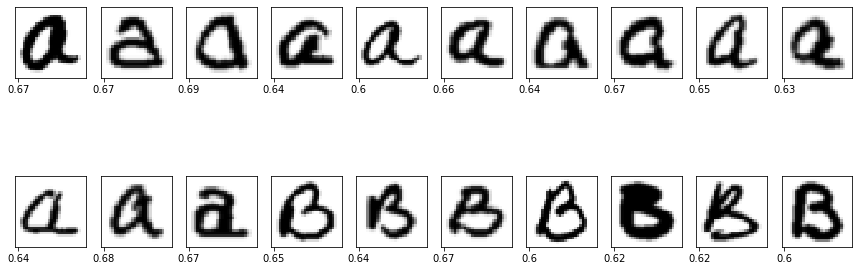

In [11]:
Show_Results(result,20)

# END